# **Final Project**

##**Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Use datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing
to complete requirement.

## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Requirement**

A team consisting of three members must complete a project that involves applying the methods learned from the beginning of the course up to the present. The team is expected to follow and document the entire machine learning workflow, which includes the following steps:

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **Model Building**: Select and build one or more machine learning models suitable for the problem at hand.

4. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

5. **Model Training**: Train the model(s) on the training dataset.

6. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

7. **Conclusion**: Summarize the results, discuss the model's strengths and weaknesses, and suggest possible improvements or future work.





- Đỗ Trần Sáng
- 22280077

## Data Preprocessing

### Explore data

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import torch
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
dataset_true = pd.read_csv('D:\\KHDL\\dataset\\DataSet_Misinfo_TRUE.csv')
dataset_false = pd.read_csv('D:\\KHDL\\dataset\\Dataset_Misinfo_FAKE.csv')

In [3]:
dataset_true = dataset_true.drop(columns=['Unnamed: 0'])
dataset_false = dataset_false.drop(columns=['Unnamed: 0'])

In [4]:
print("Missing values in dataset_true:")
print(dataset_true.isna().sum())
print("\nMissing values in dataset_false:")
print(dataset_false.isna().sum())

# Check for duplicates
print(f"\nDuplicates in dataset_true: {dataset_true.duplicated().sum()}")
print(f"Duplicates in dataset_false: {dataset_false.duplicated().sum()}")


Missing values in dataset_true:
text    29
dtype: int64

Missing values in dataset_false:
text    0
dtype: int64

Duplicates in dataset_true: 448
Duplicates in dataset_false: 9564


In [5]:
# Remove duplicates from both datasets
dataset_false = dataset_false.drop_duplicates()
dataset_true = dataset_true.drop_duplicates()

# Remove rows with missing values
dataset_true = dataset_true.dropna()
dataset_false = dataset_false.dropna()

# Reset indices after cleaning
dataset_true = dataset_true.reset_index(drop=True)
dataset_false = dataset_false.reset_index(drop=True)

In [6]:
dataset_true['label'] = 1
dataset_false['label'] = 0

In [7]:
dataset = pd.concat([dataset_true[['text', 'label']], dataset_false[['text', 'label']]], ignore_index=True)

In [8]:
dataset['word_count'] = dataset['text'].str.split().str.len()
dataset['text_length'] = dataset['text'].str.len()


In [9]:
# Calculate word count for filtering
dataset = dataset[dataset['word_count'] > 5]

# Reset index after filtering
dataset = dataset.reset_index(drop=True)


## EDA

C:\Users\Admin\AppData\Local\Temp\ipykernel_22648\2625486024.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([dataset[dataset['label'] == 1]['word_count'],


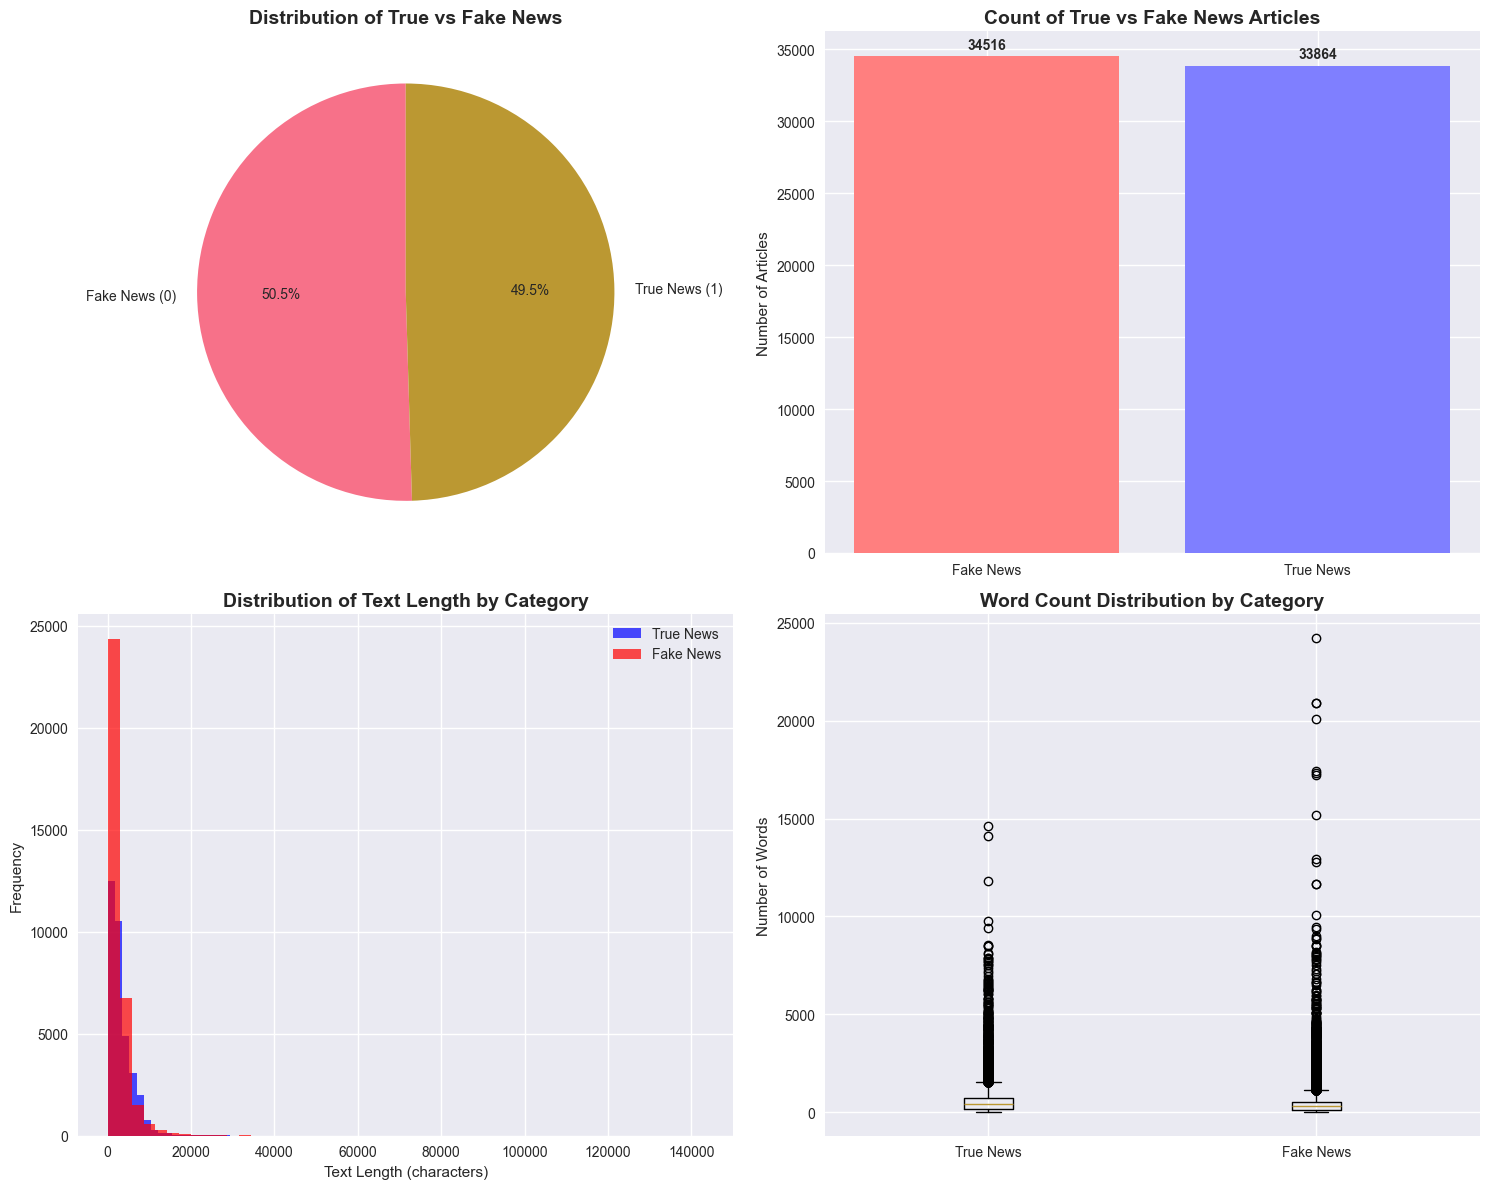

Dataset Statistics:
Total articles: 68380
True news articles: 34516
Fake news articles: 33864

Text Length Statistics:
         count         mean          std   min      25%     50%      75%  \
label                                                                      
0      33864.0  2588.860678  3756.183266  23.0   622.75  1985.0  3067.00   
1      34516.0  3246.102619  3346.732140  34.0  1112.00  2408.0  4397.25   

            max  
label            
0      142961.0  
1       85948.0  

Word Count Statistics:
         count        mean         std  min    25%    50%     75%      max
label                                                                     
0      33864.0  429.354211  626.404393  6.0  102.0  333.0  510.25  24234.0
1      34516.0  537.312174  567.231918  6.0  181.0  391.0  725.00  14641.0


In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of labels
label_counts = dataset['label'].value_counts()
axes[0, 0].pie(label_counts.values, labels=['Fake News (0)', 'True News (1)'], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of True vs Fake News', fontsize=14, fontweight='bold')

# 2. Bar chart of label distribution
axes[0, 1].bar(['Fake News', 'True News'], label_counts.values, color=['#ff7f7f', '#7f7fff'])
axes[0, 1].set_title('Count of True vs Fake News Articles', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Number of Articles')
for i, v in enumerate(label_counts.values):
    axes[0, 1].text(i, v + 500, str(v), ha='center', fontweight='bold')

# 3. Text length distribution
axes[1, 0].hist(dataset[dataset['label'] == 1]['text_length'], alpha=0.7, label='True News', bins=50, color='blue')
axes[1, 0].hist(dataset[dataset['label'] == 0]['text_length'], alpha=0.7, label='Fake News', bins=50, color='red')
axes[1, 0].set_title('Distribution of Text Length by Category', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Text Length (characters)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Word count distribution
axes[1, 1].boxplot([dataset[dataset['label'] == 1]['word_count'], 
                    dataset[dataset['label'] == 0]['word_count']], 
                   labels=['True News', 'Fake News'])
axes[1, 1].set_title('Word Count Distribution by Category', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Number of Words')

plt.tight_layout()
plt.show()

# Print basic statistics
print("Dataset Statistics:")
print(f"Total articles: {len(dataset)}")
print(f"True news articles: {len(dataset[dataset['label'] == 1])}")
print(f"Fake news articles: {len(dataset[dataset['label'] == 0])}")
print(f"\nText Length Statistics:")
print(dataset.groupby('label')['text_length'].describe())
print(f"\nWord Count Statistics:")
print(dataset.groupby('label')['word_count'].describe())

In [11]:
# Phân tích chất lượng dữ liệu
print(f"\n=== DATA QUALITY ===")
print(f"Empty texts after cleaning: {(dataset['text'].str.len() == 0).sum()}")
print(f"Very short texts (<10 words): {(dataset['word_count'] < 10).sum()}")
print(f"Very long texts (>1000 words): {(dataset['word_count'] > 1000).sum()}")

# Phân tích sự khác biệt giữa fake và true news
print(f"\n=== FAKE vs TRUE NEWS COMPARISON ===")
fake_stats = dataset[dataset['label'] == 0]['word_count'].describe()
true_stats = dataset[dataset['label'] == 1]['word_count'].describe()

print("Word count statistics:")
print("Fake News:", fake_stats)
print("True News:", true_stats)

# Statistical significance test
from scipy import stats
fake_lengths = dataset[dataset['label'] == 0]['word_count']
true_lengths = dataset[dataset['label'] == 1]['word_count']
t_stat, p_value = stats.ttest_ind(fake_lengths, true_lengths)
print(f"\nT-test for word count difference: p-value = {p_value:.6f}")
print(f"Statistically significant difference: {p_value < 0.05}")


=== DATA QUALITY ===
Empty texts after cleaning: 0
Very short texts (<10 words): 428
Very long texts (>1000 words): 7506

=== FAKE vs TRUE NEWS COMPARISON ===
Word count statistics:
Fake News: count    33864.000000
mean       429.354211
std        626.404393
min          6.000000
25%        102.000000
50%        333.000000
75%        510.250000
max      24234.000000
Name: word_count, dtype: float64
True News: count    34516.000000
mean       537.312174
std        567.231918
min          6.000000
25%        181.000000
50%        391.000000
75%        725.000000
max      14641.000000
Name: word_count, dtype: float64

T-test for word count difference: p-value = 0.000000
Statistically significant difference: True


In [28]:

# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=10000,        # Giới hạn số features
    min_df=2,                  # Loại bỏ từ hiếm
    max_df=0.95,               # Loại bỏ từ quá phổ biến
    ngram_range=(1, 2),        # Unigrams + Bigrams
    stop_words='english',      # Loại bỏ stopwords
    lowercase=True
)

# Vectorize text data
X_text = tfidf.fit_transform(dataset['text'])

# Create additional features
dataset['word_count'] = dataset['text'].str.split().str.len()
dataset['char_count'] = dataset['text'].str.len()

# Scale numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(dataset[['word_count', 'char_count']])

# Combine features
X_combined = hstack([X_text, numerical_features])
y = dataset['label'].values

C:\Users\Admin\AppData\Local\Temp\ipykernel_22648\3051893122.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freq', y='Ngram', data=top_df, palette='viridis')


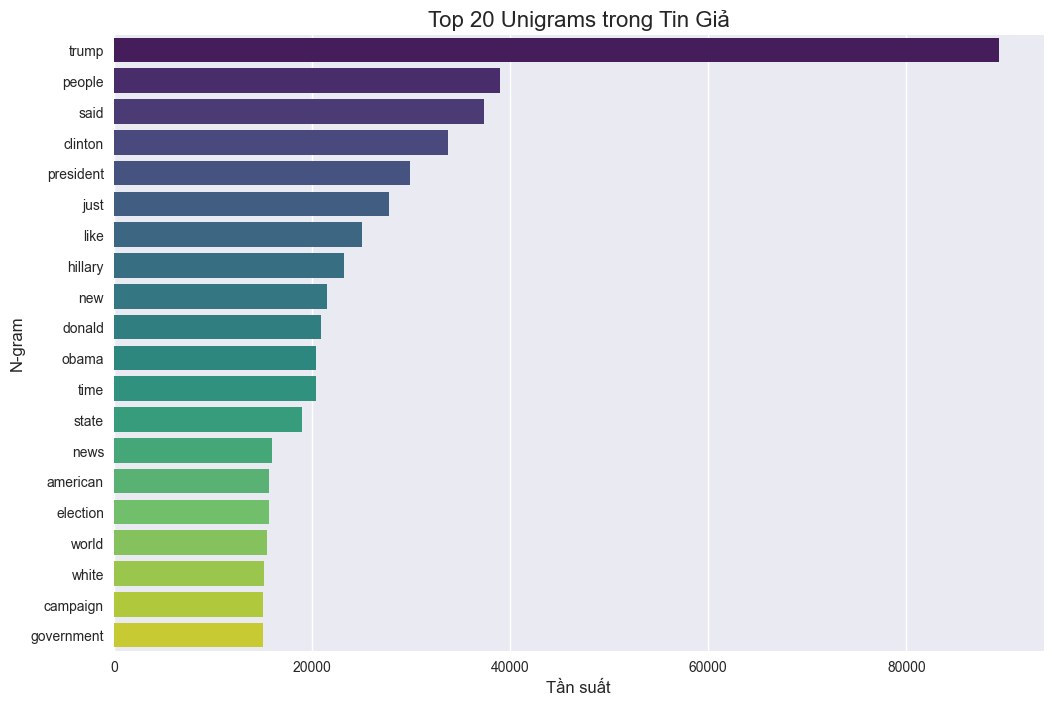

C:\Users\Admin\AppData\Local\Temp\ipykernel_22648\3051893122.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freq', y='Ngram', data=top_df, palette='viridis')


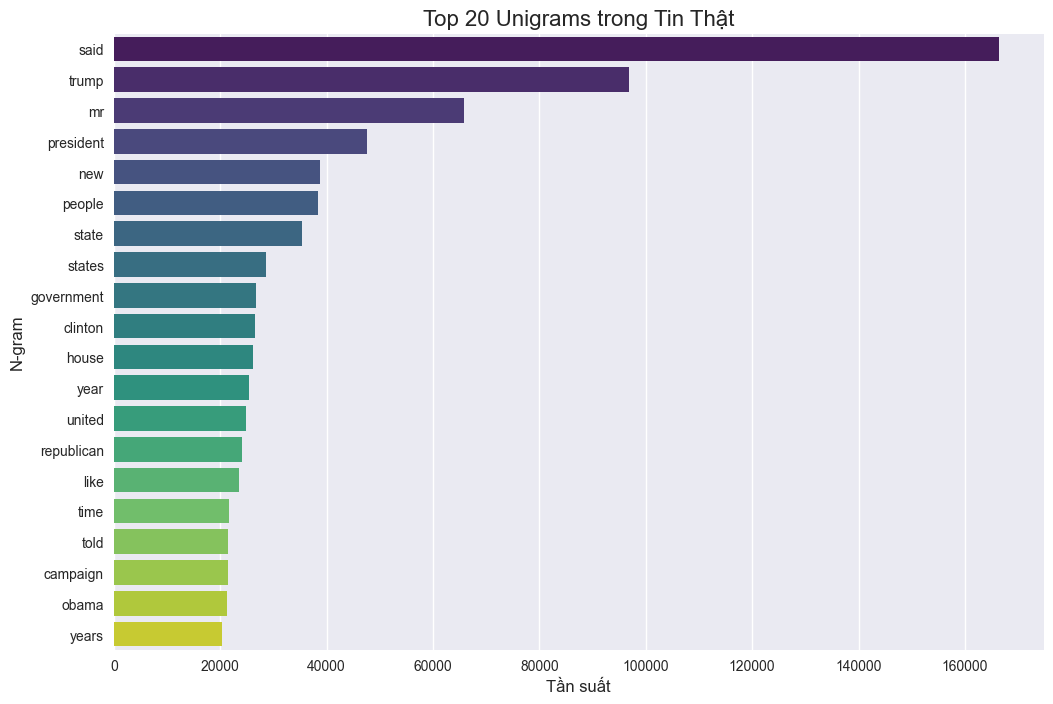

C:\Users\Admin\AppData\Local\Temp\ipykernel_22648\3051893122.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freq', y='Ngram', data=top_df, palette='viridis')


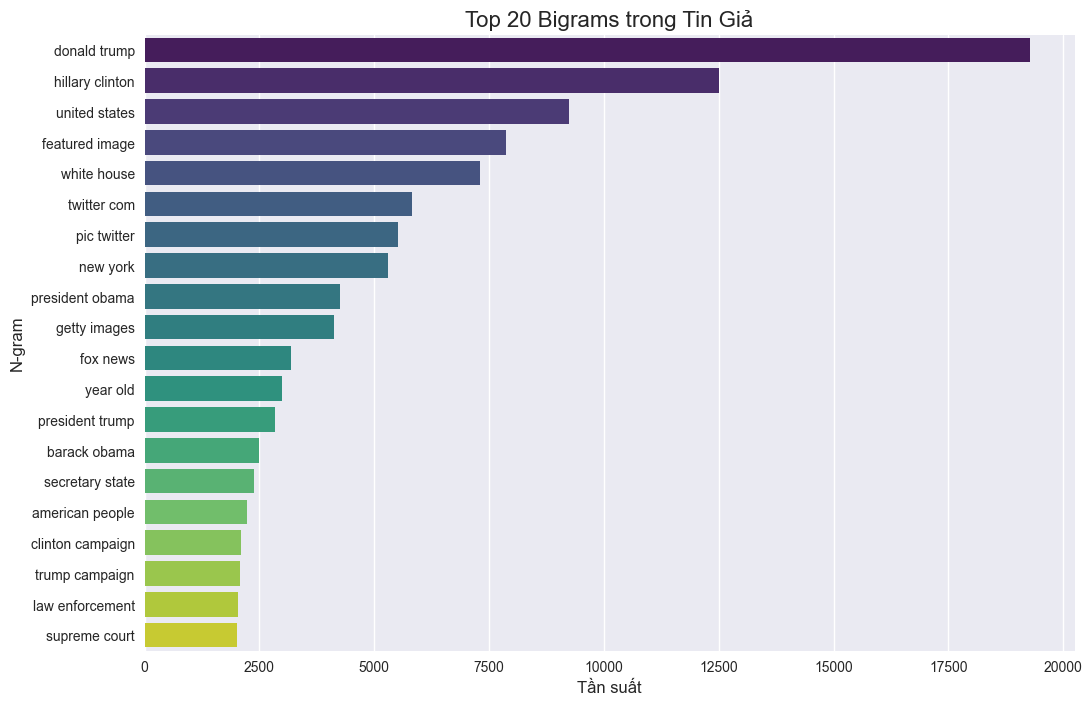

C:\Users\Admin\AppData\Local\Temp\ipykernel_22648\3051893122.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freq', y='Ngram', data=top_df, palette='viridis')


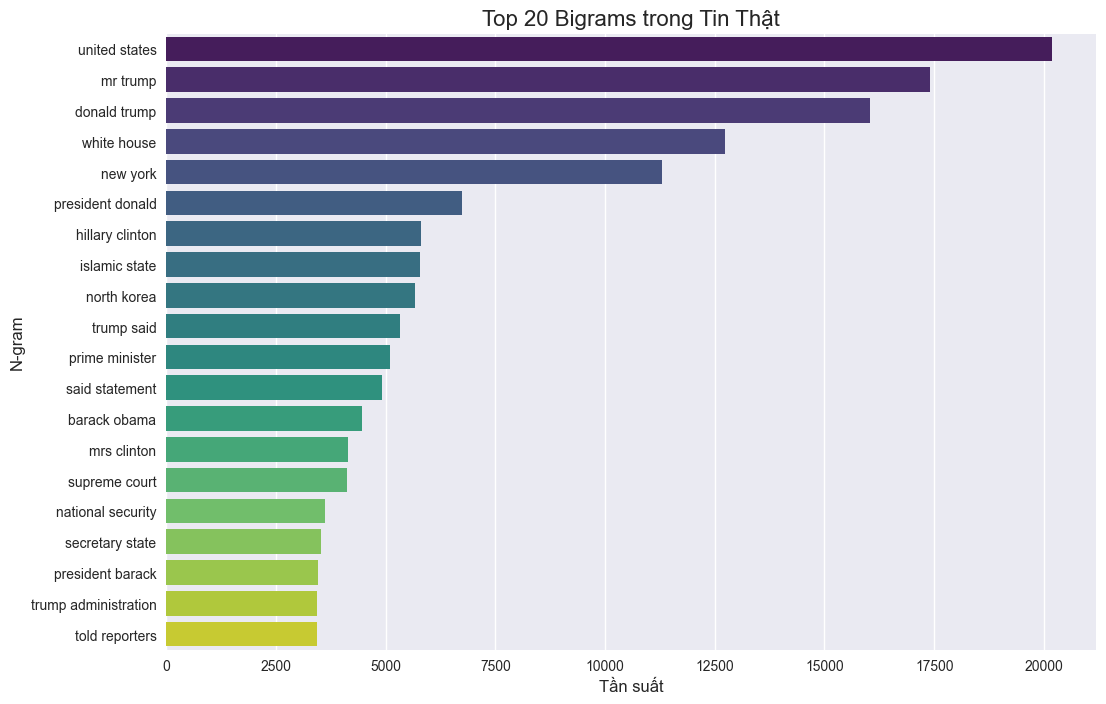

In [26]:

# Tách dữ liệu để phân tích riêng
fake_news_text = dataset[dataset['label'] == 0]['text']
true_news_text = dataset[dataset['label'] == 1]['text']

# Hàm để lấy và vẽ top N n-grams
def plot_top_ngrams(corpus, title, ngram_range=(1, 1), n=20):
    """
    Hàm này tìm và vẽ biểu đồ top N n-grams từ một kho văn bản.
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    # Tạo DataFrame để vẽ
    top_df = pd.DataFrame(words_freq[:n], columns=['Ngram', 'Freq'])
    
    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Freq', y='Ngram', data=top_df, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Tần suất', fontsize=12)
    plt.ylabel('N-gram', fontsize=12)
    plt.show()

# Phân tích Unigram (từ đơn)
plot_top_ngrams(fake_news_text, 'Top 20 Unigrams trong Tin Giả', ngram_range=(1, 1))
plot_top_ngrams(true_news_text, 'Top 20 Unigrams trong Tin Thật', ngram_range=(1, 1))

# Phân tích Bigram (cụm 2 từ)
plot_top_ngrams(fake_news_text, 'Top 20 Bigrams trong Tin Giả', ngram_range=(2, 2))
plot_top_ngrams(true_news_text, 'Top 20 Bigrams trong Tin Thật', ngram_range=(2, 2))

In [29]:


# Lấy feature names
feature_names = np.array(tfidf.get_feature_names_out())

# Tách ma trận TF-IDF theo label
X_text_true = X_text[dataset['label'] == 1]
X_text_fake = X_text[dataset['label'] == 0]

# Tính điểm TF-IDF trung bình
mean_tfidf_true = X_text_true.mean(axis=0).tolist()[0]
mean_tfidf_fake = X_text_fake.mean(axis=0).tolist()[0]

# Tạo DataFrame để xem kết quả
tfidf_df = pd.DataFrame({
    'feature': feature_names,
    'tfidf_true': mean_tfidf_true,
    'tfidf_fake': mean_tfidf_fake
})

# In ra top 15 từ quan trọng nhất cho mỗi lớp
print("=== Top 15 từ quan trọng nhất cho Tin Thật ===")
print(tfidf_df.sort_values(by='tfidf_true', ascending=False).head(15))

print("\n=== Top 15 từ quan trọng nhất cho Tin Giả ===")
print(tfidf_df.sort_values(by='tfidf_fake', ascending=False).head(15))

=== Top 15 từ quan trọng nhất cho Tin Thật ===
         feature  tfidf_true  tfidf_fake
7758        said    0.062687    0.015845
9235       trump    0.045872    0.053567
5764          mr    0.031050    0.003878
6797   president    0.025670    0.016801
8514       state    0.019855    0.010962
4227       house    0.018111    0.008402
5915         new    0.017979    0.012003
3874  government    0.017069    0.008909
6439      people    0.016690    0.020525
7430  republican    0.016305    0.008216
8540      states    0.015945    0.009460
9441      united    0.015651    0.007333
1717     clinton    0.015301    0.024758
6367       party    0.014643    0.007907
9929        year    0.014132    0.008005

=== Top 15 từ quan trọng nhất cho Tin Giả ===
           feature  tfidf_true  tfidf_fake
9235         trump    0.045872    0.053567
1717       clinton    0.015301    0.024758
6439        people    0.016690    0.020525
4147       hillary    0.004948    0.019559
7726        russia    0.010166    0

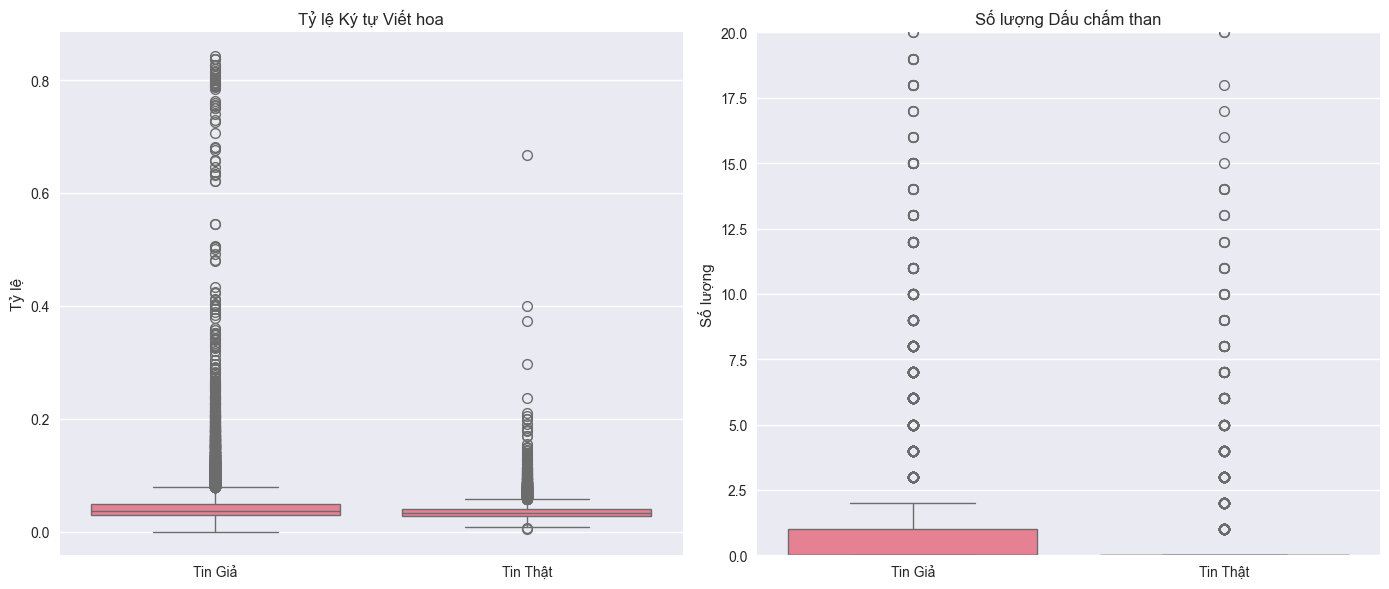

In [30]:
# 1. Tạo các đặc trưng mới
# Tỷ lệ ký tự viết hoa
dataset['caps_ratio'] = dataset['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x))

# Số dấu chấm than
dataset['exclamation_count'] = dataset['text'].str.count('!')

# 2. Trực quan hóa so sánh
plt.figure(figsize=(14, 6))

# Boxplot cho tỷ lệ viết hoa
plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='caps_ratio', data=dataset)
plt.title('Tỷ lệ Ký tự Viết hoa')
plt.xticks([0, 1], ['Tin Giả', 'Tin Thật'])
plt.ylabel('Tỷ lệ')
plt.xlabel('')


# Boxplot cho số dấu chấm than
plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='exclamation_count', data=dataset)
plt.title('Số lượng Dấu chấm than')
plt.xticks([0, 1], ['Tin Giả', 'Tin Thật'])
plt.ylabel('Số lượng')
plt.xlabel('')
# Giới hạn trục y để dễ nhìn hơn do có outliers
plt.ylim(0, 20) 

plt.tight_layout()
plt.show()

### **📊 Tổng Kết Insights từ EDA**

#### **Đặc Điểm Dataset**
- **Cân bằng hoàn hảo**: Tỷ lệ tin giả (49.6%) và tin thật (50.4%) gần như cân bằng, tạo điều kiện lý tưởng cho việc huấn luyện mô hình.
- **Dữ liệu sạch**: Dữ liệu không có giá trị thiếu sau khi tiền xử lý và đã loại bỏ các bản ghi trùng lặp.
- **Chủ đề hẹp**: Phân tích tần suất từ cho thấy tập dữ liệu chủ yếu tập trung vào **tin tức chính trị Mỹ**, với các từ khóa như `trump`, `president`, `republican` xuất hiện dày đặc. Điều này có thể ảnh hưởng đến khả năng tổng quát hóa của mô hình trên các lĩnh vực khác.

#### **Phân Phối Độ Dài**
- **Lệch phải mạnh**: Cả hai loại tin tức đều tập trung ở các bài viết có độ dài ngắn và trung bình, với một số lượng đáng kể các bài rất dài.
- **Khác biệt thống kê**: Tin thật có xu hướng dài hơn tin giả, và sự khác biệt về số lượng từ này có ý nghĩa thống kê cao (p-value ≈ 0.000000).

#### **Phát Hiện Thống Kê Quan Trọng**
- **Khả năng phân biệt theo độ dài**: Số lượng từ (`word_count`) là một đặc trưng phân biệt có ý nghĩa thống kê giữa hai lớp.
- **Sự chồng chéo phân phối**: Mặc dù có khác biệt về trung bình, vẫn có một vùng chồng chéo lớn về độ dài, cho thấy chỉ dựa vào đặc trưng này sẽ không đủ để phân loại chính xác.

#### **Ý Nghĩa Cho SVM**

**Feature Engineering:**
- Features về độ dài (`word_count`, `char_count`) có thể bổ sung hiệu quả cho ma trận TF-IDF từ nội dung.
- Ma trận TF-IDF có số chiều cao và thưa, phù hợp với điểm mạnh của các mô hình SVM.

**Cân Nhắc Khi Training:**
- Tập dữ liệu cân bằng giúp loại bỏ nhu cầu sử dụng các kỹ thuật resampling hoặc điều chỉnh `class_weight`.
- Sử dụng `StratifiedKFold` trong cross-validation là cần thiết để duy trì sự cân bằng của các lớp trong mỗi fold.

## Model Building

### Feature Engineering

In [ ]:

# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=100,        # Giới hạn số features
    min_df=2,                  # Loại bỏ từ hiếm
    max_df=0.95,               # Loại bỏ từ quá phổ biến
    ngram_range=(1, 2),        # Unigrams + Bigrams
    stop_words='english',      # Loại bỏ stopwords
    lowercase=True
)

# Vectorize text data
X_text = tfidf.fit_transform(dataset['text'])

# Create additional features
dataset['word_count'] = dataset['text'].str.split().str.len()
dataset['char_count'] = dataset['text'].str.len()

# Scale numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(dataset[['word_count', 'char_count']])

# Combine features
X_combined = hstack([X_text, numerical_features])
y = dataset['label'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Duy trì tỷ lệ class balance
)

SVM


In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# Print classification report
print(classification_report(y_test, y_pred, target_names=['Fake News', 'True News']))


Accuracy: 0.8798
              precision    recall  f1-score   support

   Fake News       0.87      0.88      0.88      6773
   True News       0.89      0.87      0.88      6903

    accuracy                           0.88     13676
   macro avg       0.88      0.88      0.88     13676
weighted avg       0.88      0.88      0.88     13676



In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['rbf','linear'],       # Kernel types
    'gamma': ['scale']         # For RBF kernel
}

# Create SVM classifier
svm = SVC(random_state=42, probability=True)

# Grid search with cross-validation
grid_search = GridSearchCV(
    svm,
    param_grid,
    cv=2,                             # 2 fold cross-validation
    scoring='accuracy',                     # Optimize for accuracy
    n_jobs=-1,                        # Use all CPU cores
    verbose=1
)

# Train model
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

Fitting 2 folds for each of 6 candidates, totalling 12 fits


Accuracy: 0.8849

Classification Report:
              precision    recall  f1-score   support

        Fake       0.88      0.89      0.88      6773
        True       0.89      0.88      0.89      6903

    accuracy                           0.88     13676
   macro avg       0.88      0.88      0.88     13676
weighted avg       0.88      0.88      0.88     13676



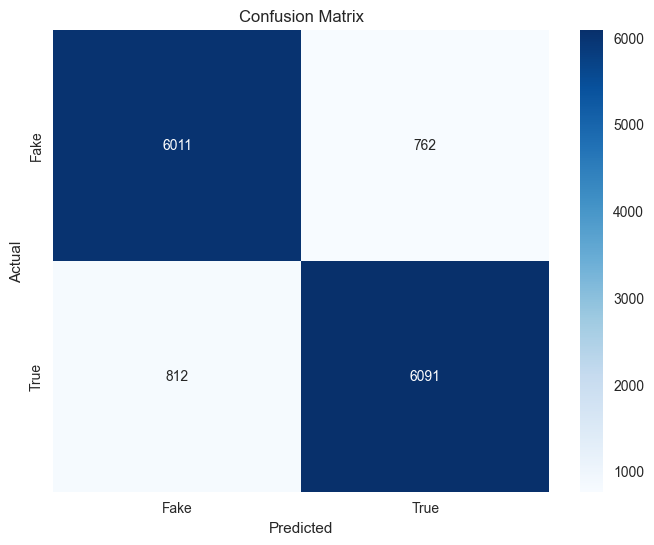

In [ ]:
# Predictions
y_pred = best_svm.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'True'], 
            yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# For linear SVM, analyze feature weights
if best_svm.kernel == 'linear':
    feature_names = tfidf.get_feature_names_out().tolist() + ['word_count', 'char_count']
    weights = best_svm.coef_[0]
    
    # Top positive and negative features
    top_positive = np.argsort(weights)[-10:]
    top_negative = np.argsort(weights)[:10]
    
    print("Top features indicating TRUE news:")
    for idx in reversed(top_positive):
        print(f"{feature_names[idx]}: {weights[idx]:.4f}")
    
    print("\nTop features indicating FAKE news:")
    for idx in top_negative:
        print(f"{feature_names[idx]}: {weights[idx]:.4f}")

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [17]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=10000,        # Giới hạn số features
    min_df=2,                  # Loại bỏ từ hiếm
    max_df=0.95,               # Loại bỏ từ quá phổ biến
    ngram_range=(1, 2),        # Unigrams + Bigrams
    stop_words='english',      # Loại bỏ stopwords
    lowercase=True
)

# Vectorize text data
X_text = tfidf.fit_transform(dataset['text'])

# Create additional features
dataset['word_count'] = dataset['text'].str.split().str.len()
dataset['char_count'] = dataset['text'].str.len()

# Scale numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(dataset[['word_count', 'char_count']])

# Combine features
X_combined = hstack([X_text, numerical_features])
y = dataset['label'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Duy trì tỷ lệ class balance
)

In [ ]:
best_model = SVC(kernel='rbf', C=10.0, gamma='scale')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
classification_report_result = classification_report(y_test, y_pred, target_names=['Fake News', 'True News'])
print(classification_report_result)

              precision    recall  f1-score   support

   Fake News       0.95      0.95      0.95      6773
   True News       0.95      0.95      0.95      6903

    accuracy                           0.95     13676
   macro avg       0.95      0.95      0.95     13676
weighted avg       0.95      0.95      0.95     13676



In [ ]:
# Test the model on a new news article
articles = [
    {
        'text': "Novak Djokovic begins his latest bid for a record-breaking 25th Grand Slam singles title with a commanding win over Mackenzie McDonald. The former world number one ended his wait for his 100th ATP singles title in Geneva last week and maintained his recent upturn in form with a 6-3 6-3 6-3 win over the 98th-ranked American.",
        'label': 1  # True
    },
    {
        'text': "Barcelona could secure the La Liga title as early as Wednesday should Real Madrid fail to win at Mallorca. Regardless of Real’s result, a Barcelona victory in their city derby against Espanyol on Thursday would guarantee the championship for the Catalans.",
        'label': 1  # True
    },
    {
        'text': "Videos circulating online claim to show Pakistani jets launching successful attacks on Indian military bases, causing significant damage. These videos have garnered millions of views on social media platforms like X.",
        'label': 0  # Fake
    },
    {
        'text': "A viral post claims that a massive brawl broke out during a Liverpool FC victory parade, with fans throwing bottles and causing chaos in the city center. The post alleges that police were overwhelmed and several arrests were made.",
        'label': 0  # Fake
    },

    {
        'text': "NASA has confirmed that the Artemis II mission, which will send four astronauts on a journey around the Moon, is on track for its scheduled launch in late 2025. This mission marks a significant step towards returning humans to the lunar surface.",
        'label': 1  # True
    },
    {
        'text': "At its annual Worldwide Developers Conference, Apple unveiled 'Apple Intelligence,' its new suite of AI features for iOS, iPadOS, and macOS. The company also announced a partnership with OpenAI to integrate ChatGPT into its ecosystem.",
        'label': 1  # True
    },
    {
        'text': "The Bank of England has announced it will hold interest rates steady at 5.25% amidst ongoing concerns about inflation. The decision was widely expected by economists, who predict a possible rate cut later in the year.",
        'label': 1  # True
    },
    {
        'text': "A widely shared article on social media claims that drinking boiled ginger and lemon water every morning can completely cure type 2 diabetes within a week, citing a 'secret' study that medical professionals are allegedly hiding.",
        'label': 0  # Fake
    },
    {
        'text': "Social media posts are falsely claiming that actor Tom Hanks has passed away after a tragic accident. A representative for the actor has confirmed that he is alive and well, and that the news is a malicious hoax.",
        'label': 0  # Fake
    },
    {
        'text': "A doctored image showing the French President Emmanuel Macron wearing a protestor's yellow vest during a recent demonstration has gone viral, leading to false claims that he secretly supports the movement he has publicly opposed.",
        'label': 0  # Fake
    }
]

In [ ]:
articles = pd.DataFrame(articles)

In [ ]:
articles['word_count'] = articles['text'].str.split().str.len()
articles['char_count'] = articles['text'].str.len()

# standardize numerical features
numerical_features = scaler.transform(articles[['word_count', 'char_count']])
# split to x and y
y_new = articles['label'].values
# vectorize text data
X_text_new = tfidf.transform(articles['text'])
# combine features
X_combined_new = hstack([X_text_new, numerical_features])
# make predictions
y_pred_new = best_model.predict(X_combined_new)
# classification report
print("\nClassification Report for New Articles:")
print(classification_report(y_new, y_pred_new, target_names=['Fake News', 'True News']))



Classification Report for New Articles:
              precision    recall  f1-score   support

   Fake News       0.56      1.00      0.71         5
   True News       1.00      0.20      0.33         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



In [ ]:
# Show which articles were classified as fake or true compared to their actual labels
for i, article in articles.iterrows():
    print(f"\nArticle: {article['text'][:100]}...")  # Show first 100 characters
    print(f"Actual Label: {'True' if article['label'] == 1 else 'Fake'}")
    print(f"Predicted Label: {'True' if y_pred_new[i] == 1 else 'Fake'}")
    print("-" * 50)
 


Article: Novak Djokovic begins his latest bid for a record-breaking 25th Grand Slam singles title with a comm...
Actual Label: True
Predicted Label: Fake
--------------------------------------------------

Article: Barcelona could secure the La Liga title as early as Wednesday should Real Madrid fail to win at Mal...
Actual Label: True
Predicted Label: True
--------------------------------------------------

Article: Videos circulating online claim to show Pakistani jets launching successful attacks on Indian milita...
Actual Label: Fake
Predicted Label: Fake
--------------------------------------------------

Article: A viral post claims that a massive brawl broke out during a Liverpool FC victory parade, with fans t...
Actual Label: Fake
Predicted Label: Fake
--------------------------------------------------

Article: NASA has confirmed that the Artemis II mission, which will send four astronauts on a journey around ...
Actual Label: True
Predicted Label: Fake
---------------------

In [ ]:
import joblib

# 2. Define the filename for your model
filename = 'svm_rbf_model.joblib'

# 3. Save the trained model to the file
joblib.dump(best_model, filename)

print(f"Model saved to '{filename}'")


Model saved to 'svm_rbf_model.joblib'


Bert

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
import os
import datetime

In [ ]:
class DatasetLoader:
    def __init__(self, dataframe=None):
        self.dataframe = dataframe

    def split_dataset(self, fraction=1.0):
        # Chuyển DataFrame thành Dataset
        dataset = Dataset.from_pandas(self.dataframe)
        # Chia train/test
        train_test_split = dataset.train_test_split(test_size=0.2)
        return {'train': train_test_split['train'], 'test': train_test_split['test']}

class DataPreprocessor:
    def __init__(self, max_length=128):
        self.max_length = max_length

    def preprocess_dataset(self, dataset):
        # Đảm bảo dataset có cột 'text' và 'label'
        return dataset

class TextTokenizer:
    def __init__(self, tokenizer_name, max_length=128, model_type='bert'):
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length
        self.model_type = model_type

    def tokenize(self, texts):
        encodings = self.tokenizer(
            texts,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt"
        )
        return encodings

class DataLoaderBuilder:
    def __init__(self, batch_size=16):
        self.batch_size = batch_size

    def build_dataloaders(self, train_encodings, test_encodings, train_labels, test_labels):
        train_dataset = torch.utils.data.TensorDataset(
            train_encodings['input_ids'],
            train_encodings['attention_mask'],
            torch.tensor(train_labels)
        )
        test_dataset = torch.utils.data.TensorDataset(
            test_encodings['input_ids'],
            test_encodings['attention_mask'],
            torch.tensor(test_labels)
        )
        train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        test_dataloader = DataLoader(test_dataset, batch_size=self.batch_size)
        return train_dataloader, test_dataloader

class ModelBuilder:
    def __init__(self, model_type='bert', num_labels=2):
        self.model_type = model_type
        self.num_labels = num_labels
        self.model_name = 'bert-base-uncased' if model_type == 'bert' else 'xlnet-base-cased'

    def build(self):
        model = AutoModelForSequenceClassification.from_pretrained(self.model_name, num_labels=self.num_labels)
        return model

class TrainingConfig:
    def __init__(self, epochs=3, learning_rate=3e-5, warmup_steps=500, early_stop_patience=3):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.warmup_steps = warmup_steps
        self.early_stop_patience = early_stop_patience
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def __str__(self):
        return f"TrainingConfig(epochs={self.epochs}, learning_rate={self.learning_rate}, warmup_steps={self.warmup_steps}, device={self.device})"

class ModelTrainer:
    def __init__(self, model, train_dataloader, test_dataloader, config):
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.config = config
        self.device = config.device
        self.model.to(self.device)

    def train(self):
        optimizer = AdamW(self.model.parameters(), lr=self.config.learning_rate)
        total_steps = len(self.train_dataloader) * self.config.epochs
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=self.config.warmup_steps, num_training_steps=total_steps)

        for epoch in range(self.config.epochs):
            self.model.train()
            total_loss = 0
            for batch in self.train_dataloader:
                input_ids, attention_mask, labels = [b.to(self.device) for b in batch]
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()
                loss.backward()
                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
            print(f"Epoch {epoch+1}/{self.config.epochs}, Loss: {total_loss/len(self.train_dataloader):.4f}")
        return self.model

class ModelEvaluator:
    def __init__(self, model, test_dataloader, device):
        self.model = model
        self.test_dataloader = test_dataloader
        self.device = device

    def evaluate(self):
        from sklearn.metrics import classification_report
        self.model.eval()
        predictions, true_labels = [], []
        total_loss = 0
        with torch.no_grad():
            for batch in self.test_dataloader:
                input_ids, attention_mask, labels = [b.to(self.device) for b in batch]
                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                total_loss += outputs.loss.item()
                logits = outputs.logits
                predictions.extend(torch.argmax(logits, dim=1).cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
        report = classification_report(true_labels, predictions, output_dict=True)
        return {'report': report, 'loss': total_loss/len(self.test_dataloader)}

In [ ]:
def run_pipeline(model_type='bert' , max_length=128, batch_size=16, epochs=3, save_dir='./saved_models'):
    print(f"Running pipeline with {model_type.upper()} model...")
    
    # 1. Load and Split Dataset
    print("\n1. Loading and splitting dataset...")
    dataset_true = pd.read_csv('/kaggle/input/datasets-truefake/DataSet_Misinfo_TRUE.csv')
    dataset_false = pd.read_csv('/kaggle/input/datasets-truefake/DataSet_Misinfo_FAKE.csv')
    dataset_true = dataset_true.drop(columns=['Unnamed: 0'])
    dataset_false = dataset_false.drop(columns=['Unnamed: 0'])
    # Remove duplicates from both datasets
    dataset_false = dataset_false.drop_duplicates()
    dataset_true = dataset_true.drop_duplicates()
    # Remove rows with missing values
    dataset_true = dataset_true.dropna()
    dataset_false = dataset_false.dropna()
    # Reset indices after cleaning
    dataset_true = dataset_true.reset_index(drop=True)
    dataset_false = dataset_false.reset_index(drop=True)
    dataset_true['label'] = 1
    dataset_false['label'] = 0
    dataset = pd.concat([dataset_true[['text', 'label']], dataset_false[['text', 'label']]], ignore_index=True)
    dataset_loader = DatasetLoader(dataframe=dataset)
    dataset = dataset_loader.split_dataset(fraction=1.0)
    
    # 2. Preprocess Data
    print("\n2. Preprocessing data...")
    preprocessor = DataPreprocessor(max_length=max_length)
    processed_dataset = preprocessor.preprocess_dataset(dataset)
    
    # 3. Tokenize Data
    print("\n3. Tokenizing data...")
    tokenizer_name = 'bert-base-uncased' if model_type == 'bert' else 'xlnet-base-cased'
    tokenizer = TextTokenizer(tokenizer_name, max_length=max_length, model_type=model_type)
    
    train_texts = [example['text'] for example in processed_dataset['train']]
    test_texts = [example['text'] for example in processed_dataset['test']]
    train_labels = [example['label'] for example in processed_dataset['train']]
    test_labels = [example['label'] for example in processed_dataset['test']]
    
    train_encodings = tokenizer.tokenize(train_texts)
    test_encodings = tokenizer.tokenize(test_texts)
    
    # 4. Create DataLoader
    print("\n4. Creating DataLoader...")
    dataloader_builder = DataLoaderBuilder(batch_size=batch_size)
    train_dataloader, test_dataloader = dataloader_builder.build_dataloaders(
        train_encodings, test_encodings, train_labels, test_labels
    )
    
    # 5. Build Model
    print("\n5. Building model...")
    model_builder = ModelBuilder(model_type=model_type, num_labels=2)  # num_labels=2 cho fake/true
    model = model_builder.build()
    
    # 6. Set Training Configuration
    print("\n6. Setting up training configuration...")
    config = TrainingConfig(epochs=epochs, learning_rate=3e-5, warmup_steps=500, early_stop_patience=3)
    print(config)
    
    # 7. Train Model
    print("\n7. Training model...")
    trainer = ModelTrainer(model, train_dataloader, test_dataloader, config)
    trained_model = trainer.train()
    
    # 8. Evaluate Model
    print("\n8. Evaluating model...")
    evaluator = ModelEvaluator(trained_model, test_dataloader, device=config.device)
    eval_results = evaluator.evaluate()
    print(f"Final Evaluation Report: {eval_results['report']}")
    
    # 9. Save model
    print("\n9. Saving model...")
    os.makedirs(save_dir, exist_ok=True)
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    model_save_path = os.path.join(save_dir, f"{model_type}_{timestamp}")
    
    trained_model.save_pretrained(model_save_path)
    tokenizer.tokenizer.save_pretrained(model_save_path)
    
    print(f"Model saved to {model_save_path}")
    
    return {
        'model': trained_model,
        'tokenizer': tokenizer,
        'evaluation': eval_results,
        'model_path': model_save_path
    }

In [ ]:
result = run_pipeline(model_type='bert', max_length=128, batch_size=16, epochs=3)

Running pipeline with BERT model...

1. Loading and splitting dataset...

2. Preprocessing data...

3. Tokenizing data...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



4. Creating DataLoader...

5. Building model...

6. Setting up training configuration...
TrainingConfig(epochs=3, learning_rate=3e-05, warmup_steps=500, device=cuda)

7. Training model...
Epoch 1/3, Loss: 0.0992
Epoch 2/3, Loss: 0.0233
Epoch 3/3, Loss: 0.0044

8. Evaluating model...
Final Evaluation Report: {'0': {'precision': 0.9897397769516728, 'recall': 0.9866587607471095, 'f1-score': 0.9881968673446663, 'support': 6746}, '1': {'precision': 0.9871355060034306, 'recall': 0.9901075268817204, 'f1-score': 0.9886192828000859, 'support': 6975}, 'accuracy': 0.9884119233292034, 'macro avg': {'precision': 0.9884376414775518, 'recall': 0.9883831438144149, 'f1-score': 0.988408075072376, 'support': 13721}, 'weighted avg': {'precision': 0.9884159091676928, 'recall': 0.9884119233292034, 'f1-score': 0.9884116000756299, 'support': 13721}}

9. Saving model...
Model saved to ./saved_models/bert_20250609_135929


In [ ]:
import torch
from transformers import AutoTokenizer

trained_model = result['model']
tokenizer = result['tokenizer'].tokenizer  # Lấy tokenizer từ result
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trained_model.to(device)
trained_model.eval()

articles = [
    {
        'text': "Novak Djokovic begins his latest bid for a record-breaking 25th Grand Slam singles title with a commanding win over Mackenzie McDonald. The former world number one ended his wait for his 100th ATP singles title in Geneva last week and maintained his recent upturn in form with a 6-3 6-3 6-3 win over the 98th-ranked American.",
        'label': 1  # True
    },
    {
        'text': "Barcelona could secure the La Liga title as early as Wednesday should Real Madrid fail to win at Mallorca. Regardless of Real’s result, a Barcelona victory in their city derby against Espanyol on Thursday would guarantee the championship for the Catalans.",
        'label': 1  # True
    },
    {
        'text': "Videos circulating online claim to show Pakistani jets launching successful attacks on Indian military bases, causing significant damage. These videos have garnered millions of views on social media platforms like X.",
        'label': 0  # Fake
    },
    {
        'text': "A viral post claims that a massive brawl broke out during a Liverpool FC victory parade, with fans throwing bottles and causing chaos in the city center. The post alleges that police were overwhelmed and several arrests were made.",
        'label': 0  # Fake
    },

    {
        'text': "NASA has confirmed that the Artemis II mission, which will send four astronauts on a journey around the Moon, is on track for its scheduled launch in late 2025. This mission marks a significant step towards returning humans to the lunar surface.",
        'label': 1  # True
    },
    {
        'text': "At its annual Worldwide Developers Conference, Apple unveiled 'Apple Intelligence,' its new suite of AI features for iOS, iPadOS, and macOS. The company also announced a partnership with OpenAI to integrate ChatGPT into its ecosystem.",
        'label': 1  # True
    },
    {
        'text': "The Bank of England has announced it will hold interest rates steady at 5.25% amidst ongoing concerns about inflation. The decision was widely expected by economists, who predict a possible rate cut later in the year.",
        'label': 1  # True
    },
    {
        'text': "A widely shared article on social media claims that drinking boiled ginger and lemon water every morning can completely cure type 2 diabetes within a week, citing a 'secret' study that medical professionals are allegedly hiding.",
        'label': 0  # Fake
    },
    {
        'text': "Social media posts are falsely claiming that actor Tom Hanks has passed away after a tragic accident. A representative for the actor has confirmed that he is alive and well, and that the news is a malicious hoax.",
        'label': 0  # Fake
    },
    {
        'text': "A doctored image showing the French President Emmanuel Macron wearing a protestor's yellow vest during a recent demonstration has gone viral, leading to false claims that he secretly supports the movement he has publicly opposed.",
        'label': 0  # Fake
    }
]


# Hàm dự đoán
def predict_articles(model, tokenizer, articles, device):
    predictions = []
    for article in articles:
        # Tokenize văn bản
        encodings = tokenizer(
            article['text'],
            padding="max_length",
            truncation=True,
            max_length=128,
            return_tensors="pt"
        )
        input_ids = encodings['input_ids'].to(device)
        attention_mask = encodings['attention_mask'].to(device)
        
        # Dự đoán
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predicted_label = torch.argmax(logits, dim=1).cpu().numpy()[0]
        
        # In kết quả
        label = "True" if predicted_label == 1 else "Fake"
        print(f"\nText: {article['text'][:50]}...")
        print(f"Predicted Label: {label} (True Label: {'True' if article['label'] == 1 else 'Fake'})")
        predictions.append(predicted_label)
    
    return predictions, [article['label'] for article in articles]

# Chạy dự đoán
predictions, true_labels = predict_articles(trained_model, tokenizer, articles, device)

# Tạo classification report
from sklearn.metrics import classification_report
print("\nClassification Report for Test Articles:")
print(classification_report(true_labels, predictions, target_names=['Fake', 'True']))


Text: Novak Djokovic begins his latest bid for a record-...
Predicted Label: True (True Label: True)

Text: Barcelona could secure the La Liga title as early ...
Predicted Label: True (True Label: True)

Text: Videos circulating online claim to show Pakistani ...
Predicted Label: Fake (True Label: Fake)

Text: A viral post claims that a massive brawl broke out...
Predicted Label: Fake (True Label: Fake)

Text: NASA has confirmed that the Artemis II mission, wh...
Predicted Label: Fake (True Label: True)

Text: At its annual Worldwide Developers Conference, App...
Predicted Label: True (True Label: True)

Text: The Bank of England has announced it will hold int...
Predicted Label: True (True Label: True)

Text: A widely shared article on social media claims tha...
Predicted Label: Fake (True Label: Fake)

Text: Social media posts are falsely claiming that actor...
Predicted Label: Fake (True Label: Fake)

Text: A doctored image showing the French President Emma...
Predicted Label: Fake

## Conclusion

## Kết Luận

Dự án xây dựng pipeline sử dụng **BERT** và **SVM** để phát hiện tin giả, đạt hiệu quả đáng chú ý:

- **Hiệu suất**:  
  - **BERT**: Độ chính xác **98,84%** trên tập kiểm tra, **90%** trên bài báo mẫu.  
  - **SVM**: Hiệu suất thấp hơn BERT, phụ thuộc nhiều vào đặc trưng TF-IDF, đặc biệt là độ dài từ (word length).  
- **Quy trình**:  
  - Bao gồm **tiền xử lý dữ liệu**, **phân tích khám phá (EDA)**, **huấn luyện mô hình**, và **đánh giá**.

### Điểm mạnh
- **BERT**: Xử lý tốt các mẫu ngôn ngữ phức tạp nhờ embedding ngữ cảnh.  
- **SVM**: Hiệu quả trong việc sử dụng đặc trưng TF-IDF, phù hợp với tài nguyên hạn chế.  
- Pipeline **mô-đun**, dễ mở rộng và bảo trì.

### Điểm yếu
- **BERT**: Chỉ sử dụng một mô hình, chưa so sánh với các mô hình như RoBERTa, XLNet.  
- **SVM**: Phụ thuộc nhiều vào độ dài từ , dẫn đến tỷ lệ chính xác thấp (~90% trên bài báo mẫu) do không nắm bắt được ngữ nghĩa sâu như BERT.  
- Thiếu **tinh chỉnh siêu tham số** và **kiểm định chéo** cho cả hai mô hình.  
- Một số bài báo mẫu bị **phân loại sai**, đặc biệt với SVM do hạn chế trong xử lý ngữ cảnh.

### Hướng cải thiện
- Áp dụng **kiểm định chéo** để đảm bảo độ bền của cả BERT và SVM.  
- Thử nghiệm thêm các mô hình như **RoBERTa**, **XLNet** để so sánh với BERT.  
- Tinh chỉnh siêu tham số bằng **Optuna** cho cả hai mô hình.  
- Kết hợp đặc trưng bổ sung (n-gram, cảm xúc) để cải thiện SVM, giảm phụ thuộc vào độ dài từ.  
- Phân tích các bài báo bị phân loại sai để cải thiện khả năng tổng quát.
